In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("football.csv")
df.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,48.541401,29.243810
std,7.841865,8.999063,1.386693,0.680175,26.397998,17.306565
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,26.000000,14.000000
50%,12.470000,0.500000,2.000000,0.000000,49.000000,29.000000
75%,20.950000,6.730000,3.000000,0.000000,71.000000,44.000000
max,70.820000,33.920000,11.000000,7.000000,98.000000,59.000000


In [43]:
df.head(10)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal
5,m_147,p_118,open play,head,5.49,-1.50,1,0,low,40,15,missed chance
6,m_88,p_101,open play,head,14.46,-1.25,3,0,medium,88,8,missed chance
7,m_66,p_61,open play,head,8.98,4.99,1,0,low,10,29,missed chance
8,m_132,p_84,open play,left foot,23.44,-1.25,3,0,medium,58,45,blocked shot
9,m_99,p_30,open play,left foot,8.48,3.99,2,1,medium,43,55,blocked shot


In [44]:
df.isna().sum()

matchId                   0
playerId                  0
playType                  0
bodyPart                  0
x                         0
y                         0
interveningOpponents      0
interveningTeammates      0
interferenceOnShooter    34
minute                    0
second                    0
outcome                  34
dtype: int64

Unfortunately, we can find no evidence to predict the missing values, because we have no idea about the fixture's final result, and even if we do, it's either a goal or a missed chance (we don't even know it was a battle of which two teams). As the number of rows with missing values are relatively low, we can safely remove them from out dataset.

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df = df.dropna()

Now, we wish to merge the columns, interveningOpponents and interveningTeammates, because, well, no matter whether the ball is blocked by a teammate or an opponent, it is BLOCKED, which doesn't change the outcome of the shot. 

In [47]:
df['interveners'] = df['interveningOpponents'] + df['interveningTeammates']
# df = df.drop(['interveningOpponents', 'interveningTeammates'], axis= 1)

In [48]:
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,interveners
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,1
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,3
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,8
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,5
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,2


We add two new column called "distance" and "angle". It would give us an oomph analyzing the outcome based on distance and angle. I could remove the columns, "x" and "y", but they are going to serve their purpose in the future.

In [49]:
import numpy as np
import math
def get_angle(theta):
    if(np.arctan(theta) >= 0):
        return np.degrees(np.arctan(theta))
    else:
        return np.degrees(np.arctan(theta + math.pi))

df['distance'] = (df['x'] ** 2 + df['y'] ** 2) ** (0.5)
df['theta'] = 7.32*df['x'] / (df['distance'] ** 2 - 13.3956)
df['angle'] = df['theta'].apply(get_angle)
df = df.drop(['theta'], axis = 1)


In [50]:
df.head()


,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,interveners,distance,angle
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,1,17.530810,18.544088
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,3,17.090313,13.982592
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,8,29.456534,14.153255
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,5,26.948560,15.458384
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,2,11.932141,31.315918


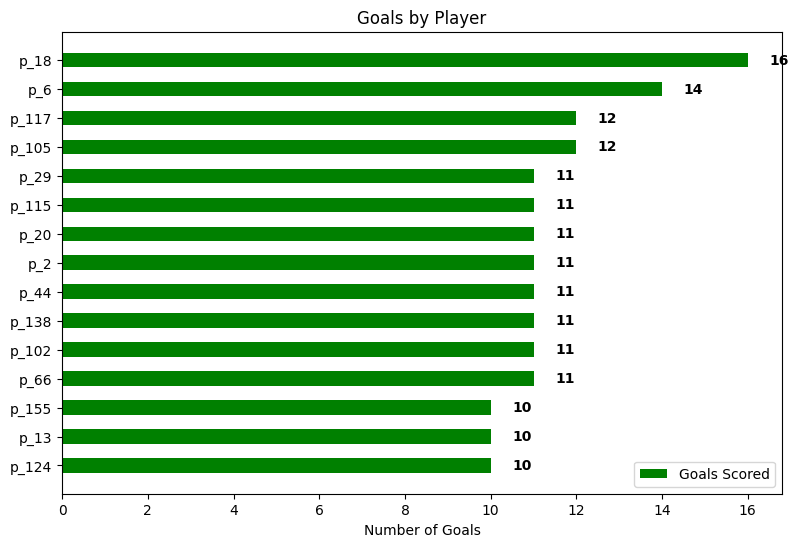

In [51]:
import matplotlib.pyplot as plt

player_stats = df.loc[df['outcome'] == 'goal'].groupby('playerId')['outcome'].count().reset_index()
player_stats.columns = ['playerId', 'goals_scored']
player_stats = player_stats.sort_values(by='goals_scored', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.5
top_players = player_stats.head(15)
player_ids = top_players['playerId'].tolist()

x = np.arange(len(player_ids))[::-1]
goals_bars = ax.barh(x, top_players['goals_scored'], color='green', height=bar_width, label='Goals Scored')
for bar, value in zip(goals_bars, top_players['goals_scored']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), va='center', fontweight='bold')

ax.set_yticks(x)
ax.set_yticklabels(player_ids)
ax.set_xlabel('Number of Goals')
ax.set_title('Goals by Player')
ax.legend()

plt.subplots_adjust(left=0.3)
plt.show()

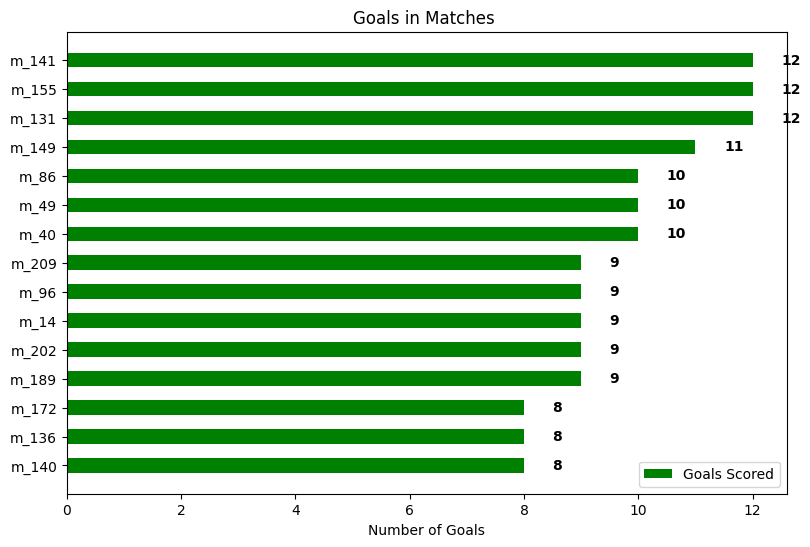

In [52]:
import matplotlib.pyplot as plt

match_stat = df.loc[df['outcome'] == 'goal'].groupby('matchId')['outcome'].count().reset_index()
match_stat.columns = ['matchId', 'goals_scored']
match_stat = match_stat.sort_values(by='goals_scored', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.5
top_matches = match_stat.head(15)
match_ids = top_matches['matchId'].tolist()

x = np.arange(len(match_ids))[::-1]

goals_bars = ax.barh(x, top_matches['goals_scored'], color='green', height=bar_width, label='Goals Scored')
for bar, value in zip(goals_bars, top_matches['goals_scored']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), va='center', fontweight='bold')

ax.set_yticks(x)
ax.set_yticklabels(match_ids)
ax.set_xlabel('Number of Goals')
ax.set_title('Goals in Matches ')
ax.legend()

# Adjust the spacing between bars
plt.subplots_adjust(left=0.3)

plt.show()

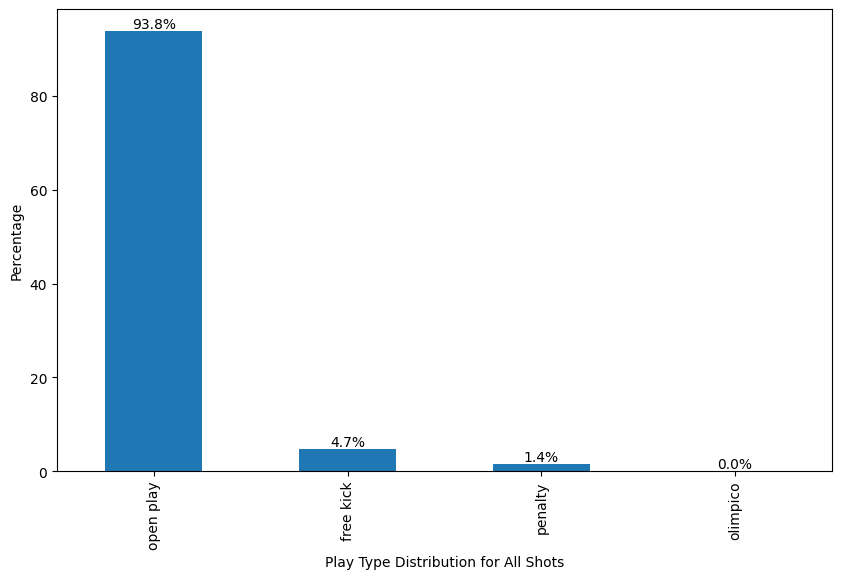

In [53]:
def play_type_percentage_plotter(df, title):
    play_type_counts = df['playType'].value_counts()

    total = len(df)

    play_type_percentage = (play_type_counts / total) * 100

    plt.figure(figsize=(10,6))
    bars = play_type_percentage.plot(kind='bar')
    plt.ylabel('Percentage')
    plt.xlabel(title)

    for rect in bars.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
        label = "{:.1f}%".format(y_value)
        plt.text(x_value, y_value, label, ha='center', va='bottom')
        
    plt.show()

play_type_percentage_plotter(df, "Play Type Distribution for All Shots")
    

In [54]:
distances = df['distance'].sort_values(ascending=False)
distances.head()

7013    71.783221
4432    64.847711
6974    60.892618
3031    59.205683
1666    58.211343
Name: distance, dtype: float64

In [55]:
y = df['y'].sort_values(ascending=False)
y

1720    33.92
2160    33.92
2548    31.17
4300    29.68
8393    29.68
        ...  
7099   -30.92
7114   -32.42
2906   -33.92
802    -33.92
3988   -33.92
Name: y, Length: 8891, dtype: float64

In [56]:
y_upscale = (45 + (45 - 37)) / 45
df['y'] = (df['y'] + 33.92) * y_upscale

In [57]:
df_new = df.copy()  # create a copy of your dataframe
df_new['outcome'] = df_new['outcome'].replace(['goal', 'own goal'], 'goal')
df_new['outcome'] = df_new['outcome'].replace(['missed chance', 'blocked shot', 'saved by keeper', 'hit the post'], 'missed')
goals = df_new[df_new['outcome'] == 'goal']
missed = df_new[df_new['outcome'] == 'missed']


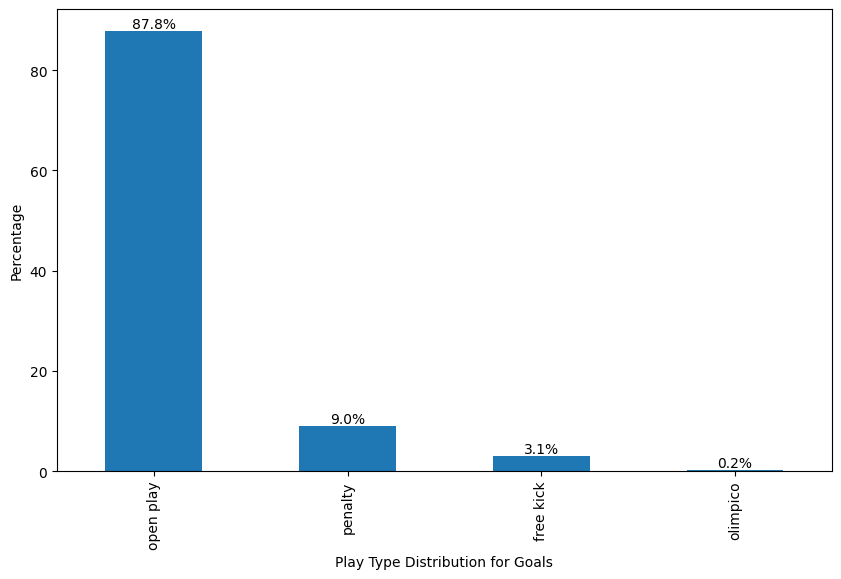

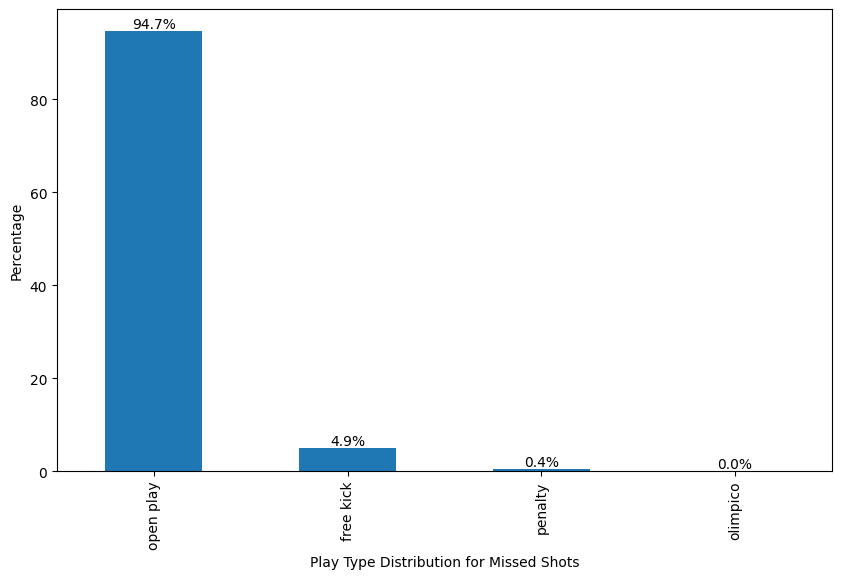

In [58]:
play_type_percentage_plotter(goals, "Play Type Distribution for Goals")
play_type_percentage_plotter(missed, "Play Type Distribution for Missed Shots")

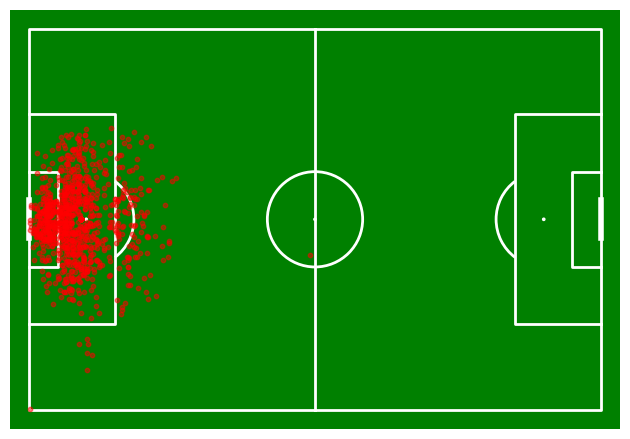

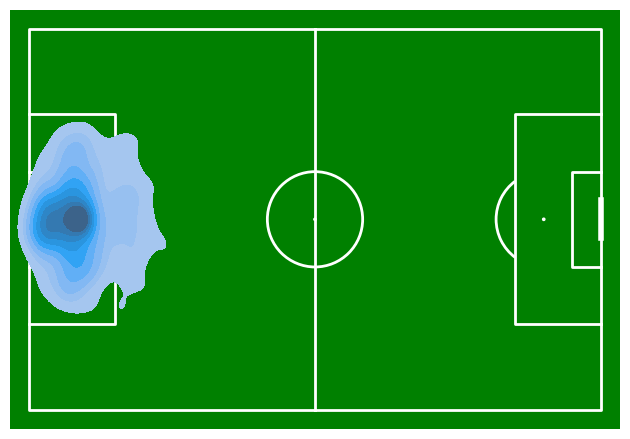

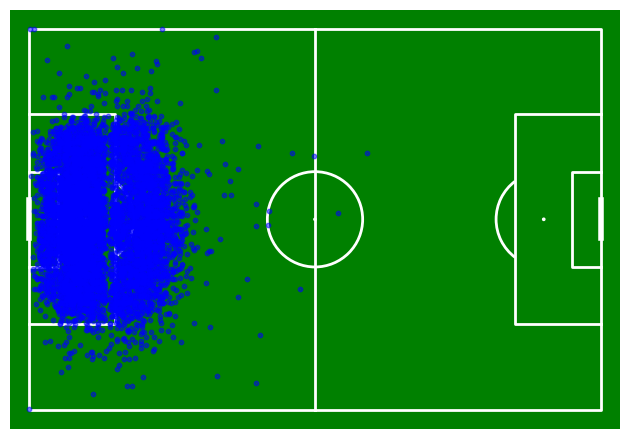

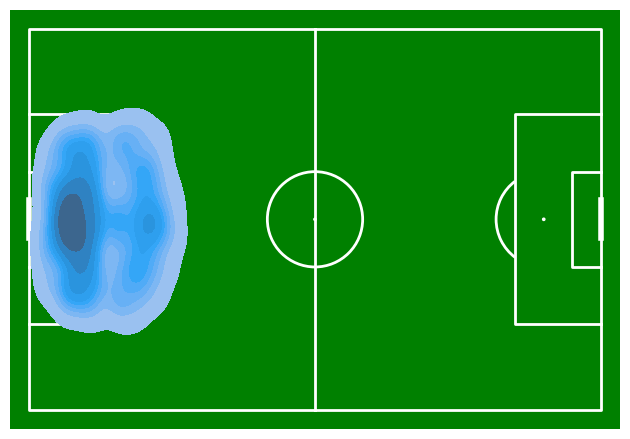

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from mplsoccer import Pitch

def draw_soccer_pitch(data, color = 'r'):
    pitch = Pitch(pitch_color='green', line_color='white', stripe=False)
    fig, ax = pitch.draw()    
    
    goals_x = data['x'].values
    goals_y = data['y'].values
    ax.scatter(goals_x, goals_y, s=10, c=color, alpha=0.5, label='Goals')
    plt.show()
    pitch = Pitch(pitch_color='green', line_color='white', stripe=False)
    fig, ax = pitch.draw() 
    sns.kdeplot(data, x='x', y='y', fill=True, palette='crest')
    plt.show()

draw_soccer_pitch(goals, 'red')

draw_soccer_pitch(missed, 'blue')


In [60]:
# I have these
#goals = df_new[df_new['outcome'] == 'goal']
# missed = df_new[df_new['outcome'] == 'missed']

goaled_penalties = len(goals[goals['playType'] == 'penalty'])
missed_penalties = len(missed[missed['playType'] == 'penalty'])
total_penalties = len(df[df['playType'] == 'penalty'])

goaled_free_kicks = len(goals[goals['playType'] == 'free kick'])
missed_free_kicks = len(missed[missed['playType'] == 'free kick'])
total_free_kicks = len(df[df['playType'] == 'free kick'])

print("Total number of penalties: %d,\nMissed: %d [ %.2f %% ]      \nGoaled: %d [ %.2f %% ]" % (total_penalties, missed_penalties, (missed_penalties / total_penalties) * 100, goaled_penalties, (goaled_penalties / total_penalties) * 100))
print()
print("Total number of free kicks: %d,\nMissed: %d [ %.2f %% ]      \nGoaled: %d [ %.2f %% ]" % (total_free_kicks, missed_free_kicks, (missed_free_kicks / total_free_kicks) * 100, goaled_free_kicks, (goaled_free_kicks / total_free_kicks) * 100))

Total number of penalties: 126,
Missed: 29 [ 23.02 % ]      
Goaled: 97 [ 76.98 % ]

Total number of free kicks: 417,
Missed: 384 [ 92.09 % ]      
Goaled: 33 [ 7.91 % ]


In [61]:
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,interveners,distance,angle
0,m_91,p_103,open play,right foot,13.47,26.735556,1,0,medium,70,9,goal,1,17.530810,18.544088
1,m_17,p_16,open play,left foot,9.48,56.698222,3,0,medium,55,4,saved by keeper,3,17.090313,13.982592
2,m_111,p_88,free kick,left foot,29.43,38.478000,6,2,low,86,31,saved by keeper,8,29.456534,14.153255
3,m_142,p_87,open play,right foot,26.93,41.128000,4,1,medium,77,2,missed chance,5,26.948560,15.458384
4,m_117,p_9,open play,right foot,10.72,46.121778,2,0,medium,76,46,goal,2,11.932141,31.315918


### Adding new features

We are going to add multiple features to our dataset.
 - **Distance of the shot**: Adding the distance between where the ball shooted and the center of goal. The distance formula using coordinates $(x_1, y_1)$ and $(x_2, y_2)$ is:
 
 
 $ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $
 
 that the $(x_2, y_2)$ is the center of goal coordinates. In our data set it is (0, 0)
 
 - **Angle of the shot**: The second thing to consider when it comes to evaluating a shot is the view the player has of the goal: the more he or she can see, the better your chance of scoring.
 
 
 $tan(a) = \frac{7.32x}{x^2 + y^2 - \left(\frac{7.32}{2}\right)^2}$

In [ ]:
interference_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_new = df.copy()
df_new['interferenceOnShooter'] = df_new['interferenceOnShooter'].map(interference_mapping)

df_new['outcome binary'] = df_new['outcome'].replace(['missed chance', 'hit the post', 'blocked shot', 'saved by keeper'], 'missed')
df_new['outcome binary'] = df_new['outcome binary'].map({'goal' : 1, 'missed' : 0})
df_new = pd.get_dummies(df_new, columns=['outcome', 'bodyPart', 'playType'], dtype=int)



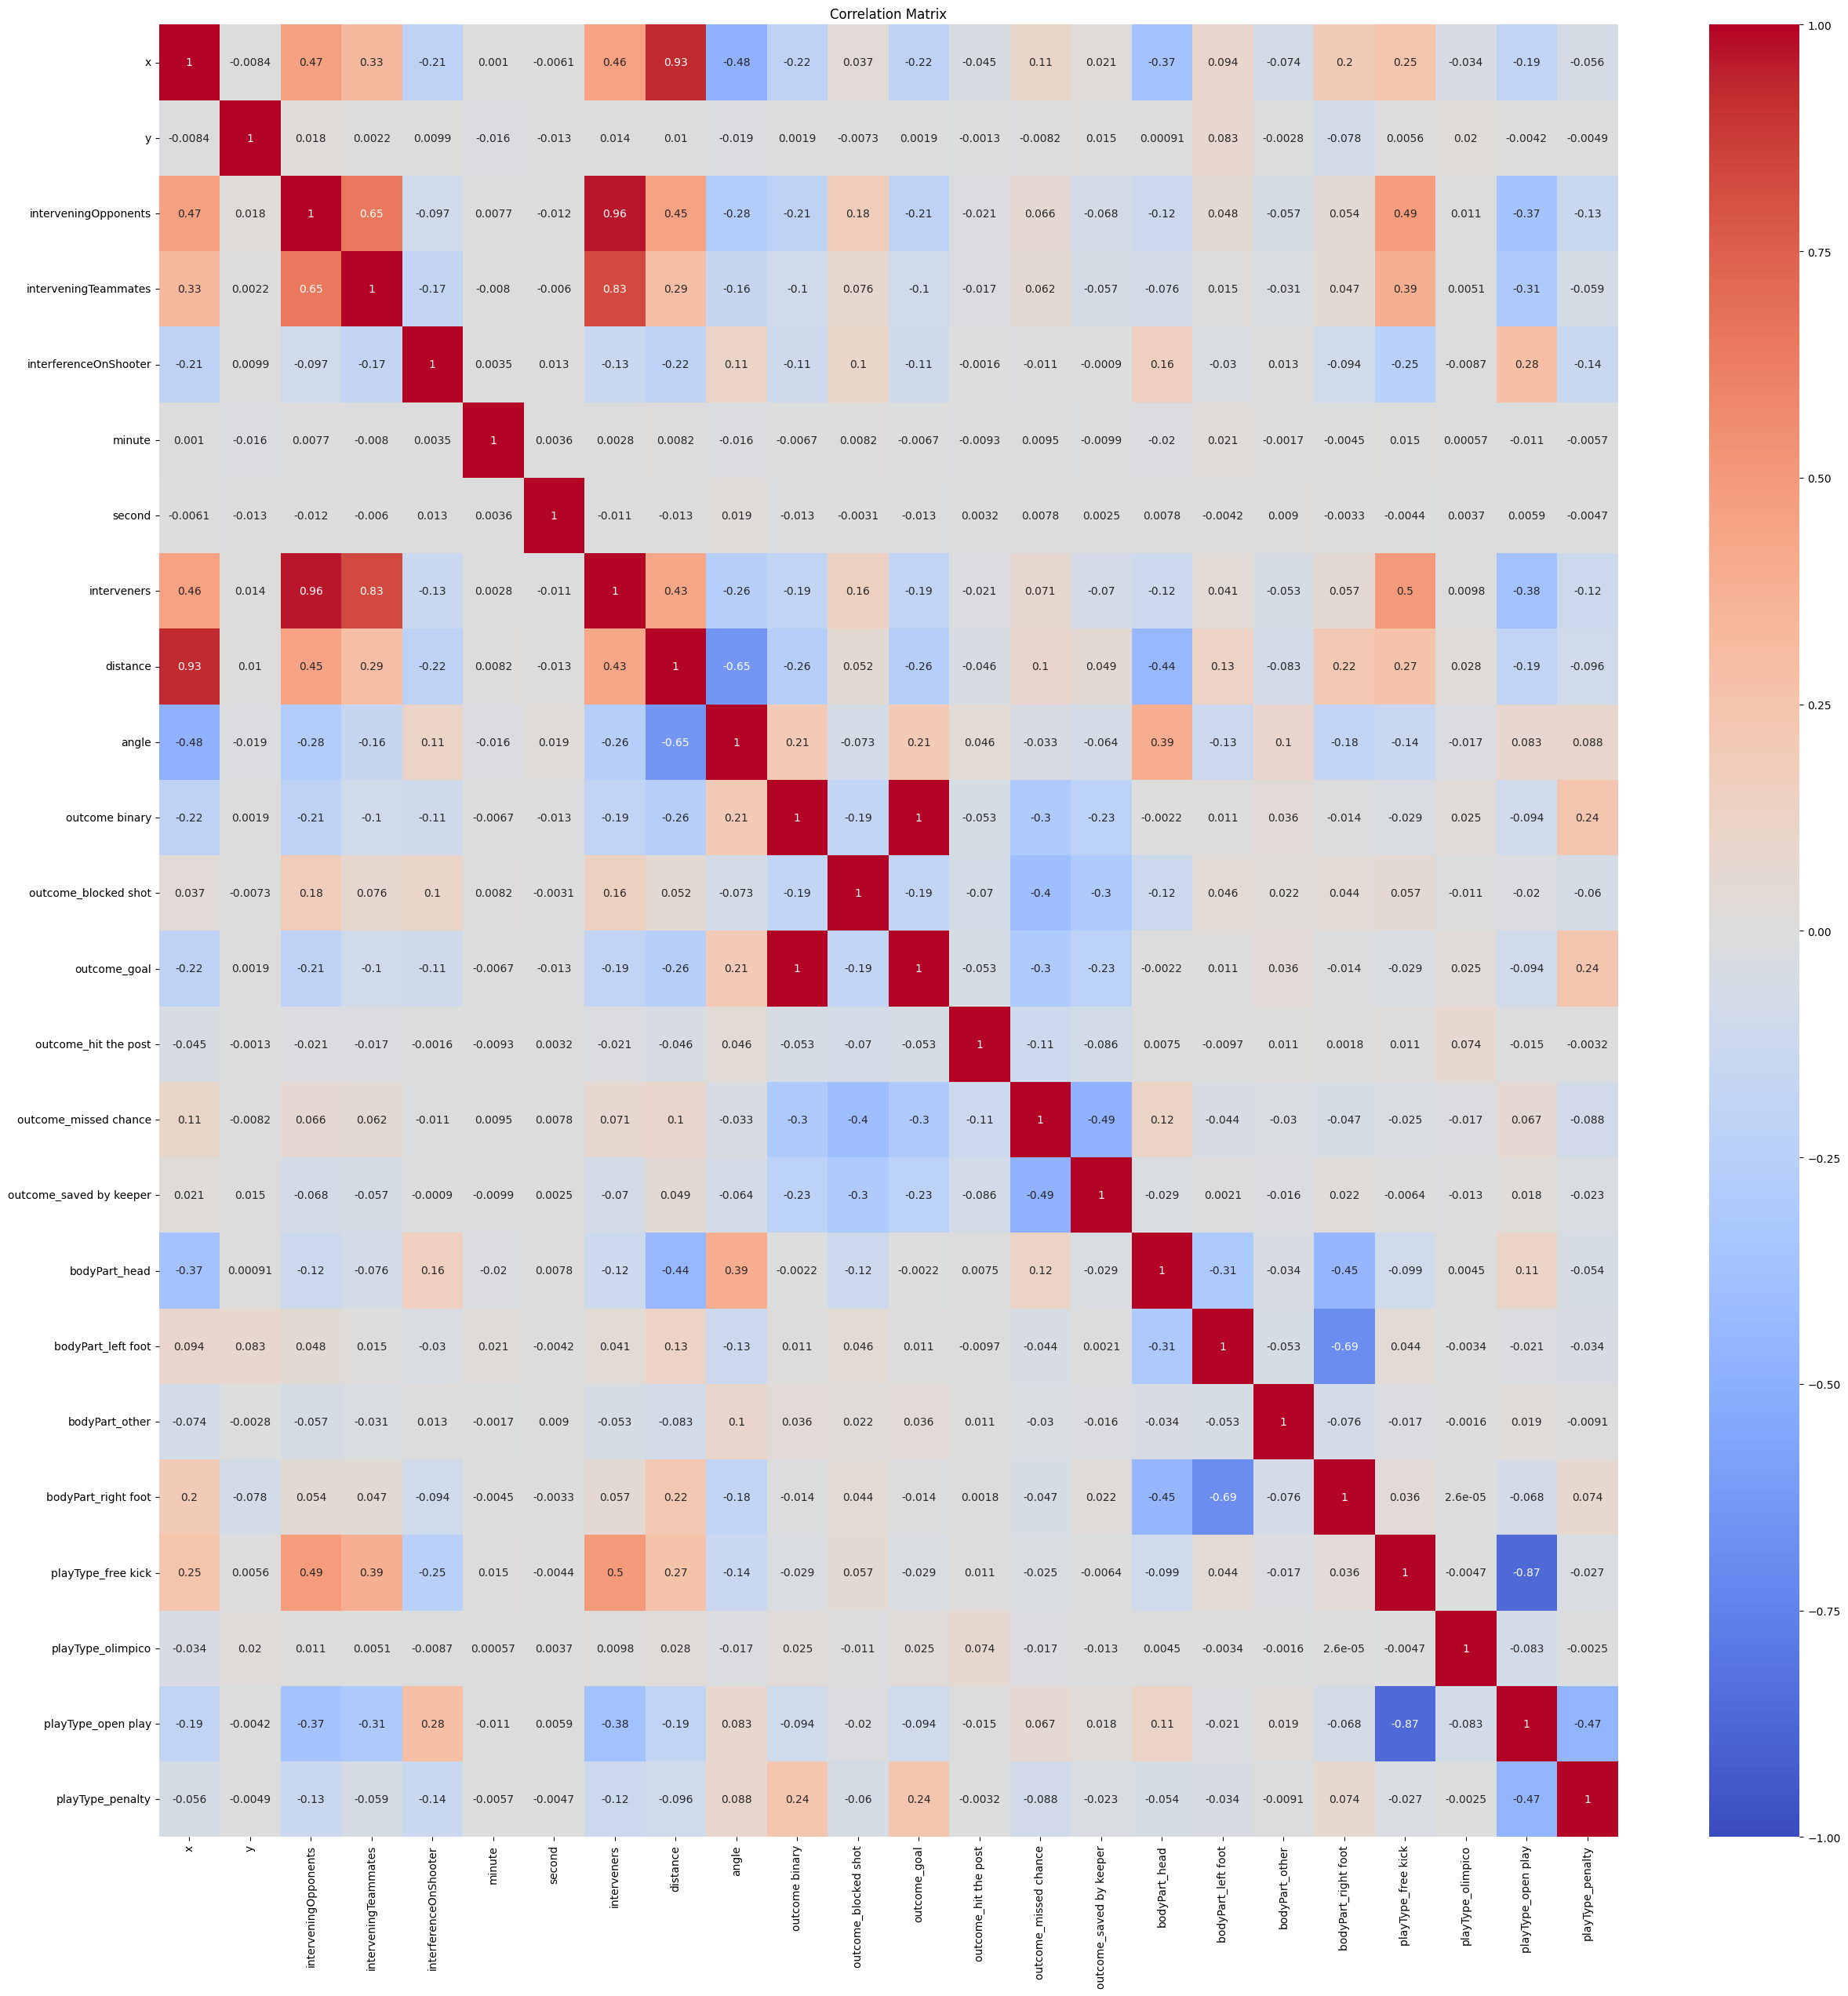

In [ ]:
df_cleaned = df_new.drop(['matchId', 'playerId'], axis = 1)
plt.figure(figsize=(30, 30))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['y'] = df['y'] - 33.92
df_backup = df.copy()
df = df.drop(['distance', 'interveners', 'angle'], axis=1)
df_model = df.copy()


In [ ]:
df_model.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-7.184444,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,22.778222,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,4.558000,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,7.208000,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,12.201778,2,0,medium,76,46,goal


Model accuracy: 0.3872962338392355


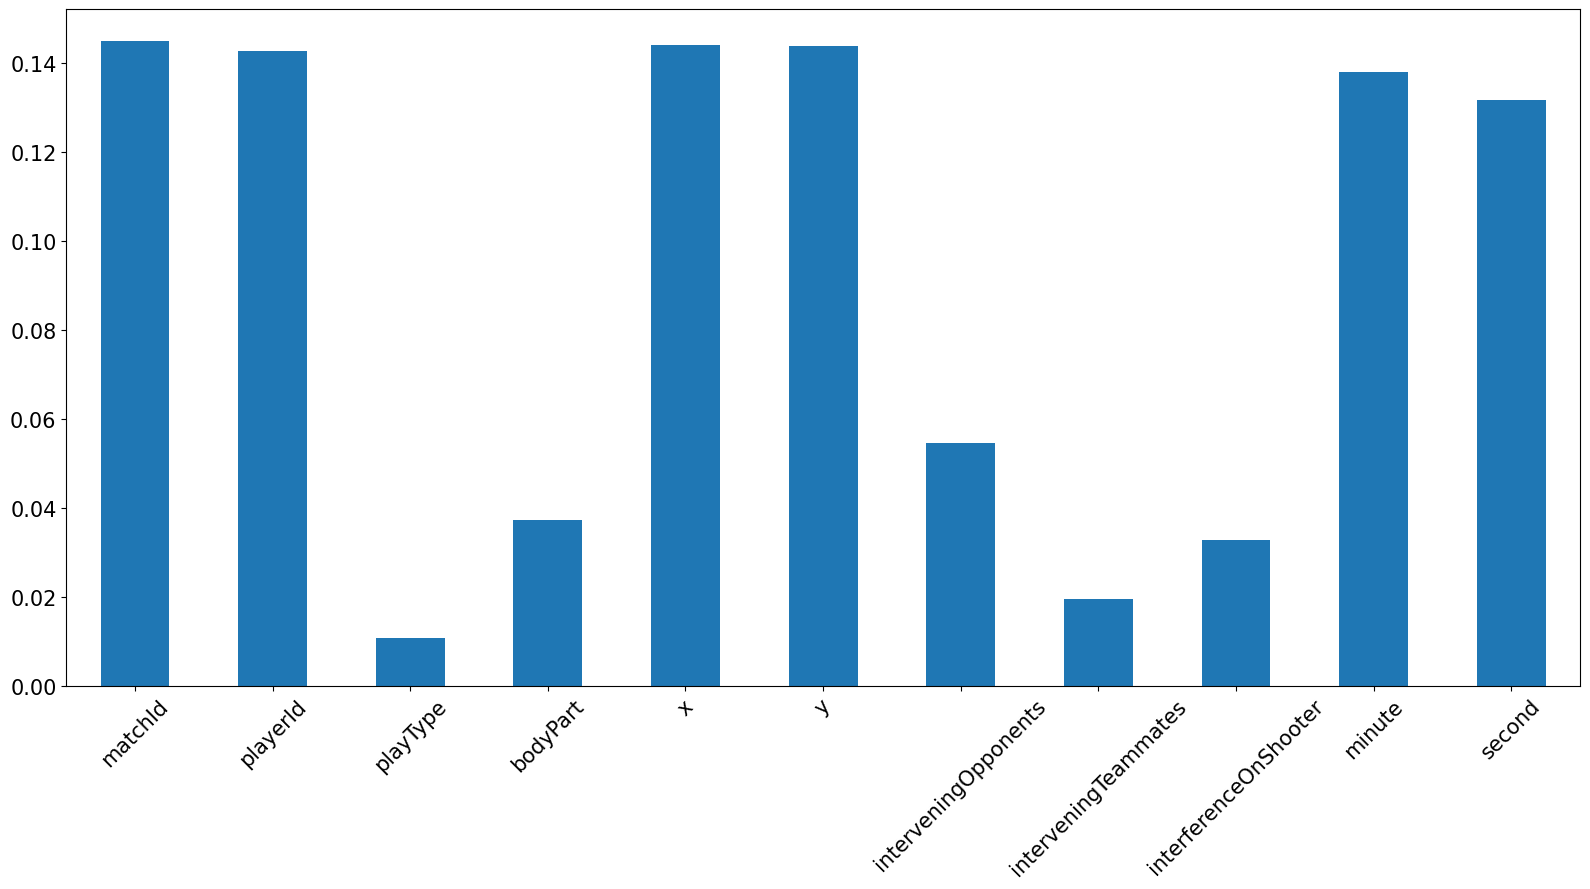

,Feature,Importance
0,matchId,0.144893
1,playerId,0.142658
2,playType,0.010824
3,bodyPart,0.037263
4,x,0.144054
5,y,0.143880
6,interveningOpponents,0.054572
7,interveningTeammates,0.019475
8,interferenceOnShooter,0.032813
9,minute,0.137987


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X = df_model.drop('outcome', axis=1)
y = df_model['outcome']  

le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == type(object):
        X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")
importances = model.feature_importances_
f_importances = pd.Series(importances, df_model.drop('outcome', axis = 1).columns)
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

plt.tight_layout()
plt.show()

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df_model.drop('outcome', axis=1) 
y = df_model['outcome'] 

le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == type(object):
        X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

importance = model.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': df_model.drop('outcome', axis = 1).columns, 'Importance': importance})
feature_importance_df

Model accuracy: 0.4024732996065205


,Feature,Importance
0,matchId,-0.000827
1,playerId,0.000208
2,playType,-0.064074
3,bodyPart,0.061640
4,x,0.014756
5,y,0.001709
6,interveningOpponents,0.235739
7,interveningTeammates,0.045861
8,interferenceOnShooter,-0.083636
9,minute,-0.000387


In [ ]:
df = df_backup.copy()
# df_model = df.drop(['matchId', 'playerId', 'second', 'playType', 'bodyPart', 'minute', 'x', 'y'], axis = 1)
interference_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_model = df.copy()
df_model['outcome'] = df_model['outcome'].map({'goal' : 1, 'missed chance' : 0, 'hit the post' : 0, 'blocked shot' : 0, 'saved by keeper' : 0})
df_model['interferenceOnShooter'] = df_model['interferenceOnShooter'].map(interference_mapping)

In [ ]:
df_model.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,interveners,distance,angle
0,m_91,p_103,open play,right foot,13.47,-7.184444,1,0,1,70,9,1,1,17.530810,18.544088
1,m_17,p_16,open play,left foot,9.48,22.778222,3,0,1,55,4,0,3,17.090313,13.982592
2,m_111,p_88,free kick,left foot,29.43,4.558000,6,2,0,86,31,0,8,29.456534,14.153255
3,m_142,p_87,open play,right foot,26.93,7.208000,4,1,1,77,2,0,5,26.948560,15.458384
4,m_117,p_9,open play,right foot,10.72,12.201778,2,0,1,76,46,1,2,11.932141,31.315918


Model accuracy: 0.8870151770657673


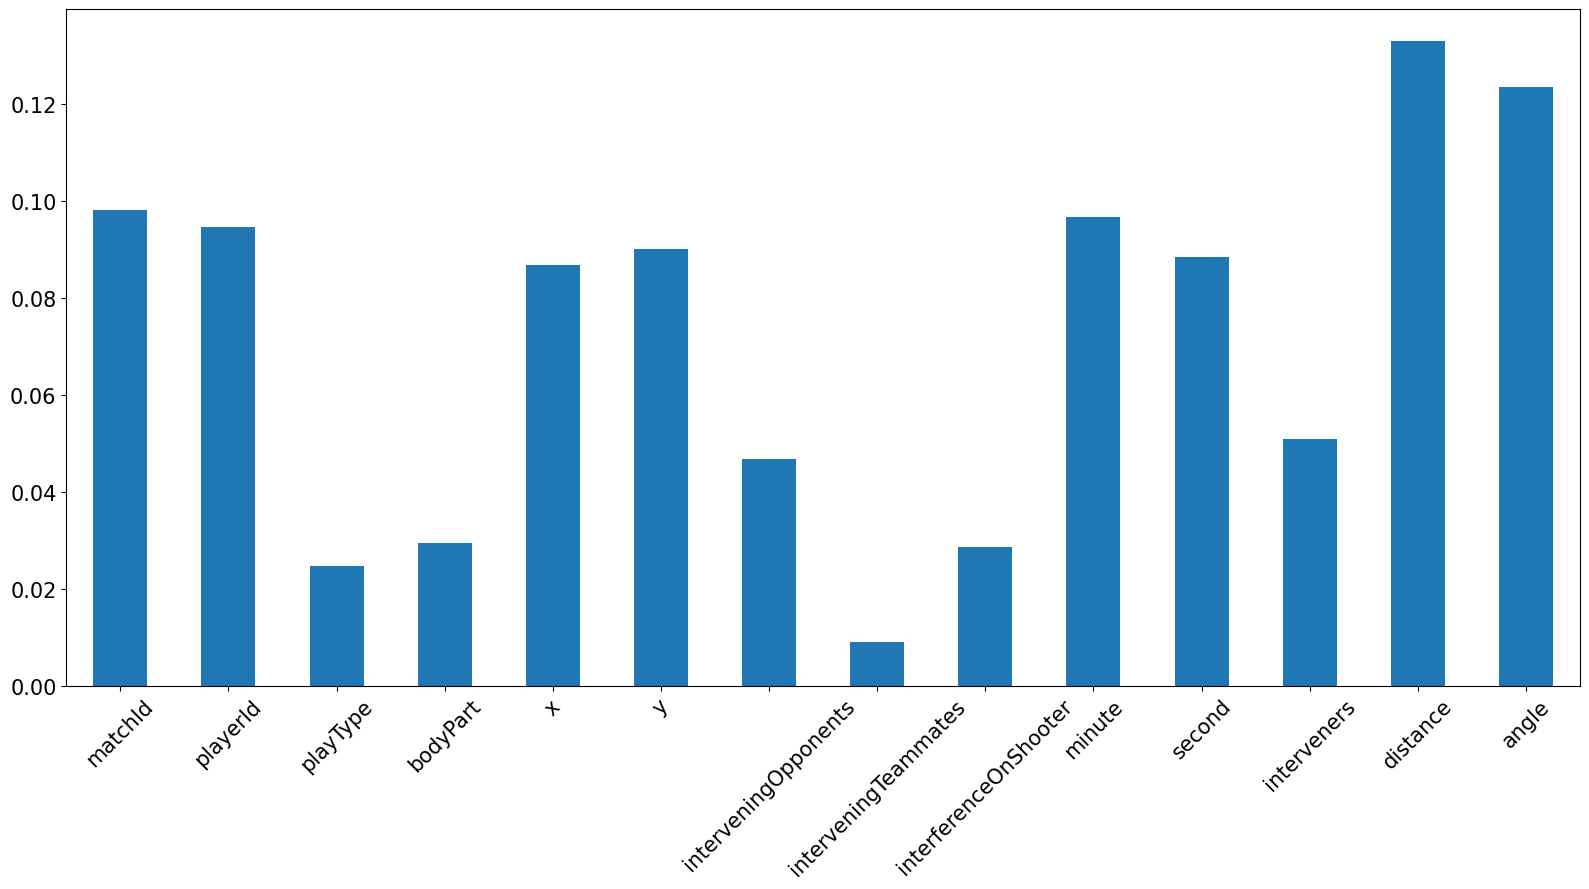

,Feature,Importance
0,matchId,0.097962
1,playerId,0.094477
2,playType,0.024675
3,bodyPart,0.029466
4,x,0.086715
5,y,0.090073
6,interveningOpponents,0.046840
7,interveningTeammates,0.009110
8,interferenceOnShooter,0.028528
9,minute,0.096668


In [ ]:
X = df_model.drop('outcome', axis=1)
y = df_model['outcome']  

le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == type(object):
        X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")
importances = model.feature_importances_
f_importances = pd.Series(importances, df_model.drop('outcome', axis = 1).columns)
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

plt.tight_layout()
plt.show()

feature_importance_df = pd.DataFrame({'Feature': df_model.drop('outcome', axis = 1).columns, 'Importance': importances})
feature_importance_df

In [ ]:

X = df_model.drop('outcome', axis=1) 
y = df_model['outcome'] 

le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == type(object):
        X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

importance = model.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': df_model.drop('outcome', axis = 1).columns, 'Importance': importance})
feature_importance_df

Model accuracy: 0.8819561551433389


,Feature,Importance
0,matchId,0.000133
1,playerId,0.000732
2,playType,0.111061
3,bodyPart,0.217984
4,x,0.117320
5,y,0.013133
6,interveningOpponents,-0.177230
7,interveningTeammates,0.071960
8,interferenceOnShooter,-0.607247
9,minute,0.001776


In [ ]:
df_model = df_model.drop(['matchId', 'playerId', 'second', 'playType', 'bodyPart', 'y'], axis = 1)
df_model


,x,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,outcome,interveners,distance,angle
0,13.47,1,0,1,70,1,1,17.530810,18.544088
1,9.48,3,0,1,55,0,3,17.090313,13.982592
2,29.43,6,2,0,86,0,8,29.456534,14.153255
3,26.93,4,1,1,77,0,5,26.948560,15.458384
4,10.72,2,0,1,76,1,2,11.932141,31.315918
...,...,...,...,...,...,...,...,...,...
8920,6.48,3,0,2,69,0,3,7.609895,46.818116
8921,21.45,4,1,1,15,0,5,23.158484,16.713121
8922,11.97,3,0,1,84,0,3,12.400746,31.970470
8923,6.48,1,0,2,4,0,1,9.524222,31.529506


Model accuracy: 0.8892636312535133


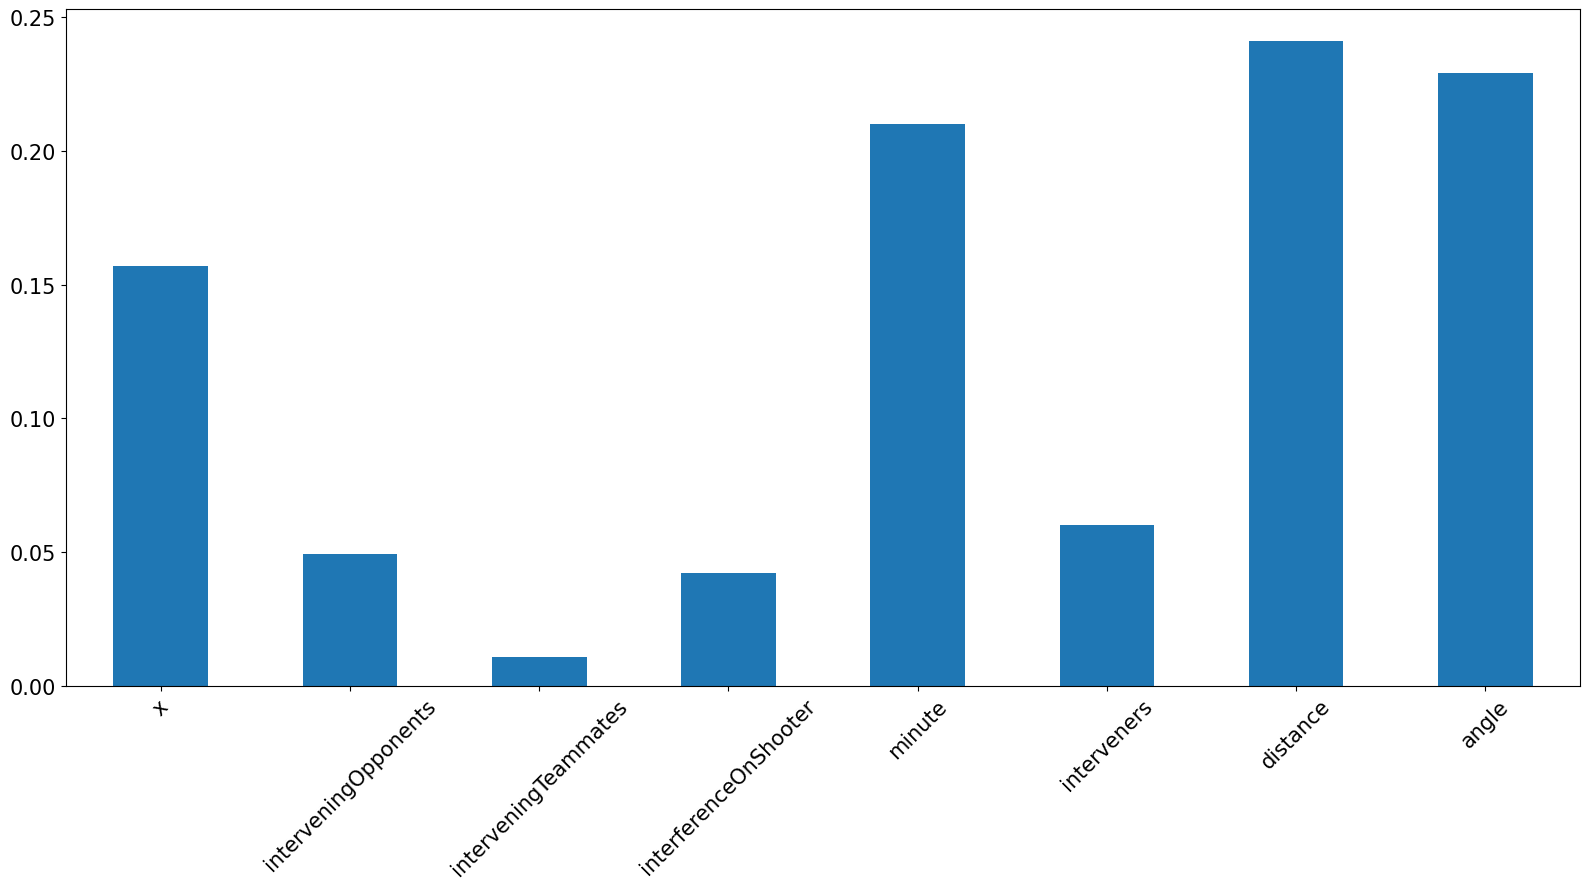

,Feature,Importance
0,x,0.157025
1,interveningOpponents,0.049344
2,interveningTeammates,0.010831
3,interferenceOnShooter,0.042273
4,minute,0.210104
5,interveners,0.060251
6,distance,0.241078
7,angle,0.229094


In [ ]:
X = df_model.drop('outcome', axis=1)
y = df_model['outcome']  

le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == type(object):
        X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

importances = model.feature_importances_
f_importances = pd.Series(importances, df_model.drop('outcome', axis = 1).columns)
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

plt.tight_layout()
plt.show()

feature_importance_df = pd.DataFrame({'Feature': df_model.drop('outcome', axis = 1).columns, 'Importance': importances})
feature_importance_df

In [ ]:
X = df_model.drop('outcome', axis=1) 
y = df_model['outcome'] 

le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == type(object):
        X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

importance = model.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': df_model.drop('outcome', axis = 1).columns, 'Importance': importance})
feature_importance_df

Model accuracy: 0.8819561551433389


,Feature,Importance
0,x,0.114113
1,interveningOpponents,-0.250728
2,interveningTeammates,0.136886
3,interferenceOnShooter,-0.687676
4,minute,0.000320
5,interveners,-0.113842
6,distance,-0.222599
7,angle,-0.004019
